### 1. Setting specifications

In [1]:
global graph_opts ///
	title(, justification(left) color(black) span pos(11)) ///
	graphregion(color(white) lc(white) lw(med) la(center)) /// <- remove la(center) for Stata < 15
	ylab(,angle(0) nogrid) xtit(,placement(left) justification(left)) ///
	yscale(noline) xscale(noline) legend(region(lc(none) fc(none)))

local opts lw(thin) lc(white) la(center)

label def case 1 "Case 1" 2 "Case 2" 3 "Case 3" 4 "Case 4" , modify

### 2. Running ado.file
``weightab`` produces xlsx sheets and/or bar graphs with weighted cross-group comparisons.

In [2]:
qui do "https://raw.githubusercontent.com/worldbank/Stata-IE-Visual-Library/develop/Library/Bar%20plots/Side%20by%20side%20horizontal%20bar%20plot%20(weightab)/weightab.ado"

### 3. Uploading data (.dta) 

In [3]:
use "https://github.com/worldbank/Stata-IE-Visual-Library/raw/develop/Library/Bar%20plots/Side%20by%20side%20horizontal%20bar%20plot%20(weightab)/data.dta", clear

### 4. Creating the graph1

In [4]:
weightab ///
	correct treat_cxr re_3 re_4 treat_refer t_12 ///
	med_any med_l_any_1 med_l_any_2 med_l_any_3  med_k_any_9   ///
	if city == 2 ///
	[pweight = weight_city] ///
	, $graph_opts barlab barlook(1 `opts' fi(100)) title("Patna") over(case) graph legend(off) xlab(${pct})

qui graph save "Fig_1_1.gph" , replace


(note:  named style med not found in class linewidth, default attributes used)
(note:  linewidth not found in scheme, default attributes used)



### 5. Creating the graph2

In [5]:
weightab ///
	correct treat_cxr re_3 re_4 treat_refer t_12 ///
	med_any med_l_any_1 med_l_any_2 med_l_any_3  med_k_any_9  ///
	if city == 3 ///
	[pweight = weight_city] ///
	, $graph_opts barlab barlook(1 `opts'  fi(100)) title("Mumbai") over(case) graph legend(pos(5) ring(0) c(1) symxsize(small) symysize(small)) xlab(${pct})

qui graph save "Fig_1_2.gph" , replace


(note:  named style med not found in class linewidth, default attributes used)
(note:  linewidth not found in scheme, default attributes used)

(file Fig_1_2.gph saved)


### 6. Combining the graphs

(note:  named style med not found in class linewidth, default attributes used)
(note:  linewidth not found in scheme, default attributes used)
(note:  named style med not found in class linewidth, default attributes used)
(note:  linewidth not found in scheme, default attributes used)


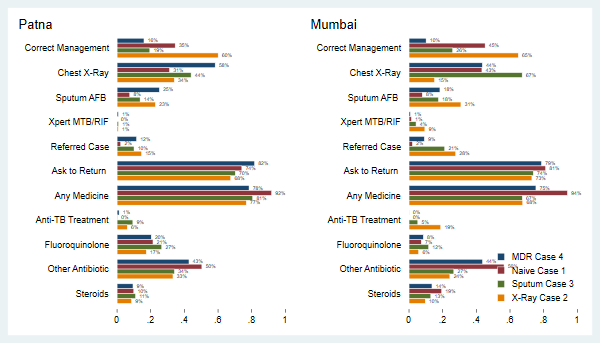

In [6]:
graph combine ///
	"Fig_1_1.gph" ///
	"Fig_1_2.gph" ///
	, $comb_opts xsize(7) r(1)

### 7. Exporting the graph 

In [7]:
qui graph export "figure.png" , replace width(2000)